In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Setting visual theme
sns.set(style="whitegrid")

In [3]:
# Load the Dataset
df = pd.read_csv("StudentsPerformance.csv")  
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Basic Info and Data Overview
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


#### Data Cleaning & Feature Engineering

In [5]:
# Renaming columns for ease of use
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [6]:
# Create new column: average score
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

In [7]:
# Check for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
average_score                  0
dtype: int64

#### Exploratory Data Analysis (EDA) & Visualizations

C:\Users\Hp\AppData\Local\Temp\ipykernel_1416\3344258143.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='pastel')


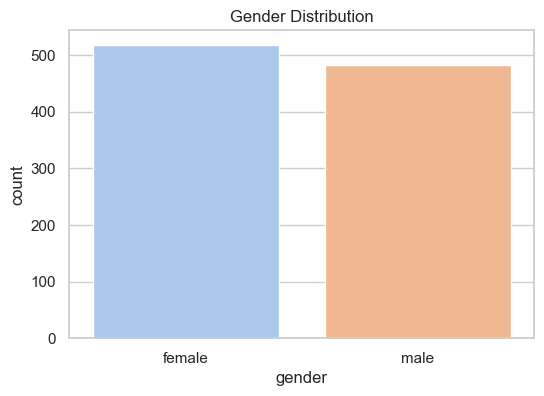

In [8]:
# Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', palette='pastel')
plt.title("Gender Distribution")
plt.show()

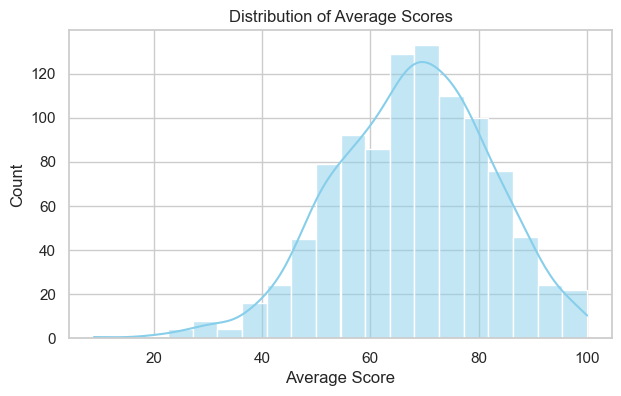

In [9]:
# Distribution of Average Scores
plt.figure(figsize=(7, 4))
sns.histplot(df['average_score'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Average Scores")
plt.xlabel("Average Score")
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_1416\3677073707.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='average_score', palette='Set2')


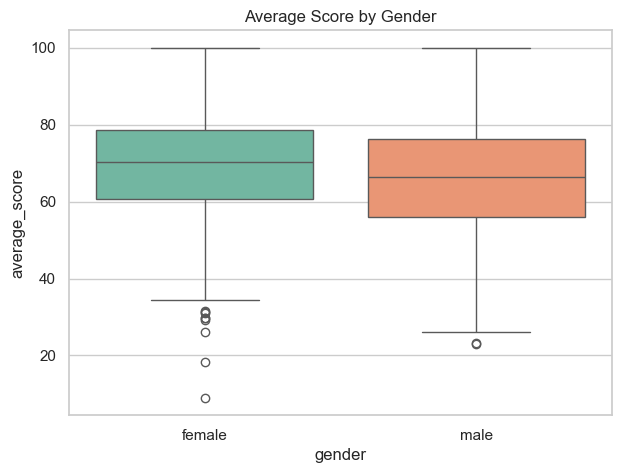

In [10]:
# Average Score by Gender
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='gender', y='average_score', palette='Set2')
plt.title("Average Score by Gender")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_1416\3694965711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='parental_level_of_education', y='average_score', palette='Set3')


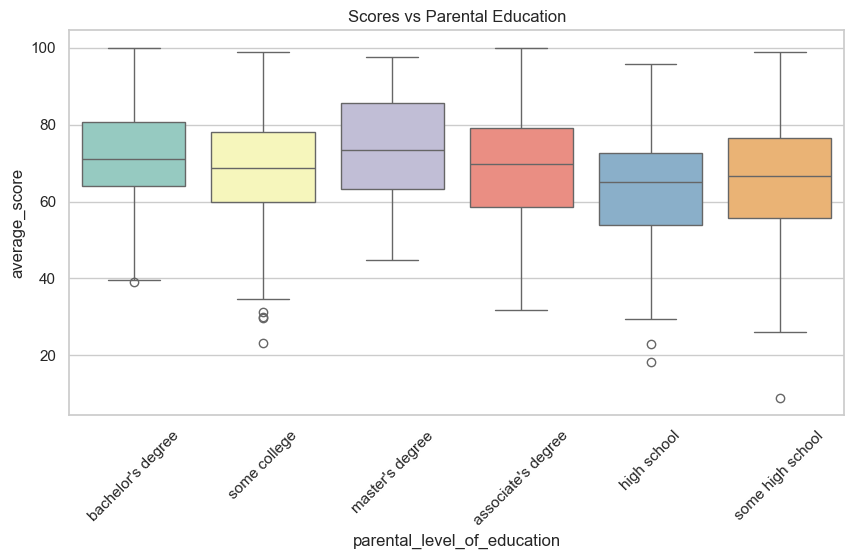

In [11]:
# Average Scores by Parental Level of Education
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='parental_level_of_education', y='average_score', palette='Set3')
plt.xticks(rotation=45)
plt.title("Scores vs Parental Education")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_1416\3449099961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='test_preparation_course', y='average_score', palette='coolwarm')


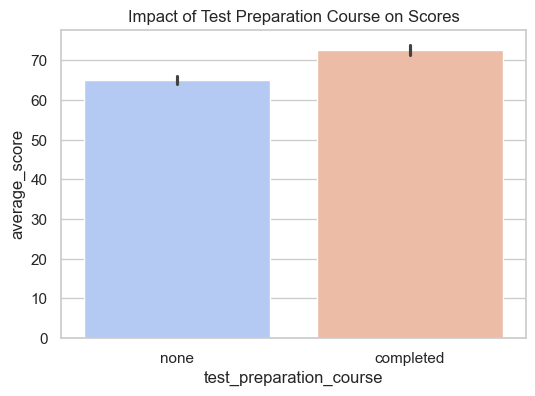

In [12]:
# Impact of Test Preparation Course
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='test_preparation_course', y='average_score', palette='coolwarm')
plt.title("Impact of Test Preparation Course on Scores")
plt.show()


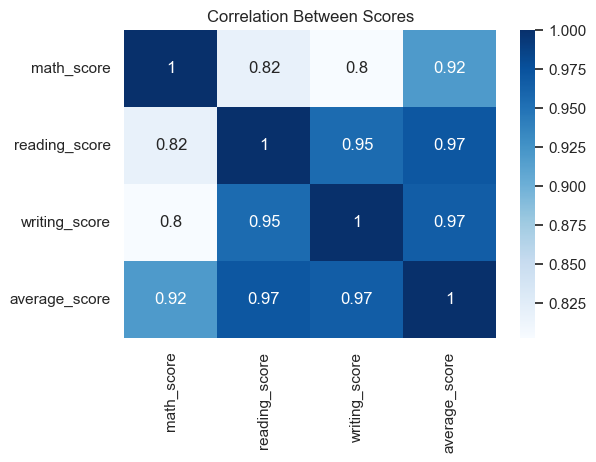

In [13]:
# Correlation Heatmap between score columns
plt.figure(figsize=(6, 4))
sns.heatmap(df[['math_score', 'reading_score', 'writing_score', 'average_score']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Between Scores")
plt.show()
